## 38 - Making a Hodograph

Watch video: [YouTube](https://www.youtube.com/watch?v=c0Uc7imDNv0)

In [22]:
import datetime
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
from metpy.plots import Hodograph
from metpy.units import units, pandas_dataframe_to_unit_arrays
from siphon.simplewebservice.wyoming import WyomingUpperAir
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [23]:
date = datetime.datetime(2010, 5, 4)
df = WyomingUpperAir.request_data(date, 'OUN')
df.columns

Index(['pressure', 'height', 'temperature', 'dewpoint', 'direction', 'speed',
       'u_wind', 'v_wind', 'station', 'station_number', 'time', 'latitude',
       'longitude', 'elevation', 'pw'],
      dtype='object')

In [24]:
df = pandas_dataframe_to_unit_arrays(df)
pressure = df['pressure']
u_wind = df['u_wind']
v_wind = df['v_wind']
heights = df['height']

In [25]:
mpcalc.wind_direction(u_wind, v_wind).round(0)

Magnitude,[265.0 262.0 255.0 250.0 243.0 240.0 234.0 225.0 226.0 230.0 220.0 235.0 260.0 248.0 245.0 220.0 220.0 218.0 215.0 210.0 218.0 231.0 239.0 260.0 275.0 320.0 317.0 308.0 305.0 300.0 299.0 292.0 290.0 290.0 284.0 260.0 215.0 215.0 215.0 210.0 218.0 240.0 240.0 258.0 280.0 275.0 275.0 275.0 280.0 302.0 310.0 310.0 285.0 280.0 260.0 248.0 240.0 240.0 244.0 245.0 245.0 245.0 245.0 245.0 245.0 245.0 245.0 242.0 240.0 238.0 235.0 235.0 238.0 250.0 242.0 238.0 235.0 238.0 242.0 245.0 245.0 272.0 290.0 235.0 245.0 228.0 217.0 205.0 220.0 228.0 245.0 310.0 315.0 45.0 110.0 110.0 174.0 185.0 266.0 350.0 351.0 5.0 43.0 74.0 75.0 95.0 108.0 120.0 104.0 356.0 340.0 353.0 355.0 330.0 330.0 300.0 285.0 300.0 303.0 310.0 308.0 303.0 290.0 290.0 290.0 nan]
Units,degree


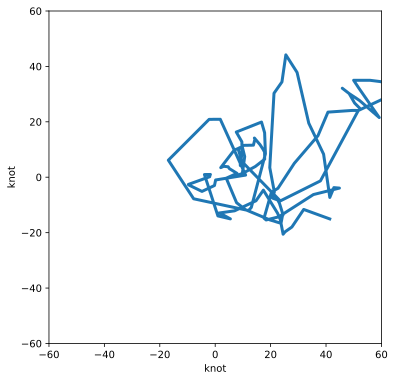

In [26]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
hodo = Hodograph(ax, component_range=60)
hodo.plot(u_wind, v_wind, linewidth=3)
plt.show()

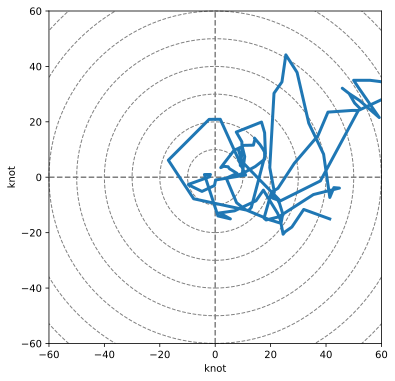

In [27]:
fig = plt.figure(2, figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
hodo = Hodograph(ax, component_range=60)
hodo.plot(u_wind, v_wind, linewidth=3)
hodo.add_grid(increment=10)
plt.show()

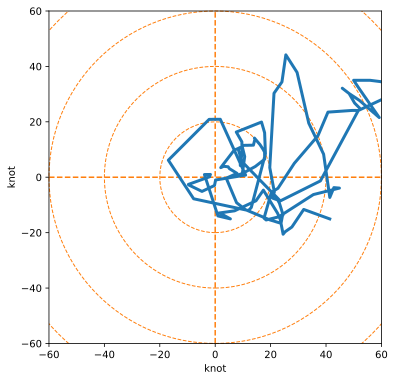

In [29]:
fig = plt.figure(3, figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
hodo = Hodograph(ax, component_range=60)
hodo.plot(u_wind, v_wind, linewidth=3)
hodo.add_grid(increment=20, color='tab:orange', linestyle='--')
plt.show()

In [30]:
p_4km, u_4km, v_4km = mpcalc.get_layer(pressure, u_wind, v_wind, height=heights, depth=4 * units.km)

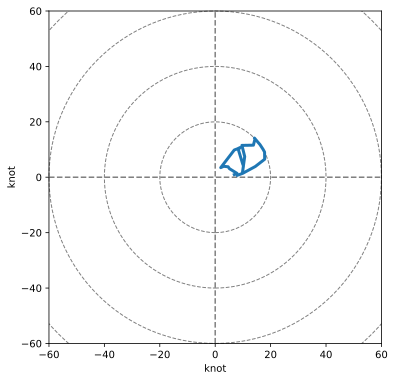

In [31]:
fig = plt.figure(3, figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
hodo = Hodograph(ax, component_range=60)
hodo.plot(u_4km, v_4km, linewidth=3)
hodo.add_grid(increment=20)
plt.show()